# Figures and analysis

This notebook contains scripts to reproduce the figures and analytical results of the manuscript. Full details of the plotting functions are typically contained in XXX.py. Figures are saved in PDF format in the figures/ folder.

# Contents

Libraries

Figures and data analysis
Figure 1. 
Figure 2. 
Figure S1. 
Figure S2. 
Analysis. Comparison of 

# Libraries

In [1]:
# Full library list and version numbers

print('Figures below were produced using the following packages:')

import os
import sys
print('python ==', sys.version)

import numpy as np
print('numpy ==', np.__version__)

import scipy as sp
import scipy.stats as st
print('scipy ==', sp.__version__)

import pandas as pd
print('pandas ==', pd.__version__)

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib ==', matplotlib.__version__)

import seaborn as sns 
print('seaborn ==', sns.__version__)

import warnings

from importlib import reload

import Plot


Figures below were produced using the following packages:
python == 3.7.6 (default, Dec 27 2019, 09:51:07) 
[Clang 11.0.0 (clang-1100.0.33.16)]
numpy == 1.21.6
scipy == 1.7.3
pandas == 1.3.5
matplotlib == 3.5.1
seaborn == 0.11.2


## Figures and data analysis

## Figure 1. Sample Cervix Images

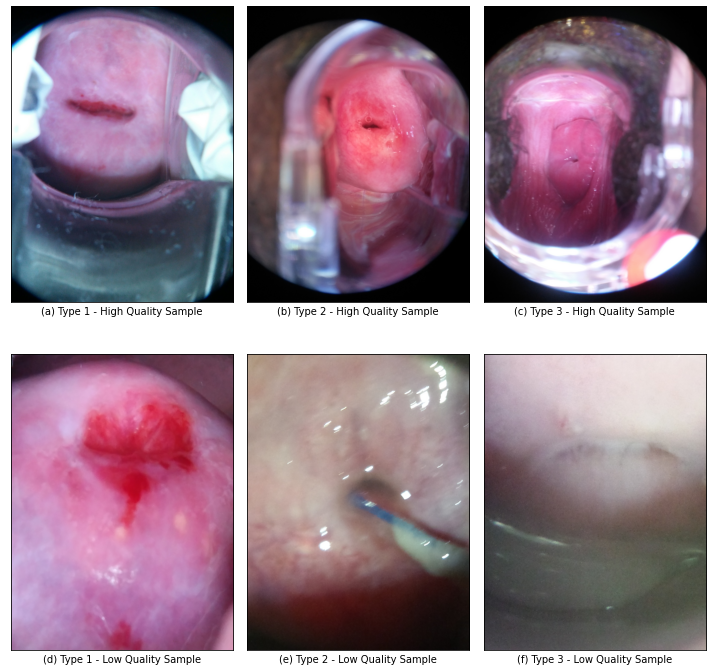

In [2]:
import matplotlib.image as mpimg

font = {'size': 10}
plt.rc('font', **font)

f, ax = plt.subplots(2, 3, figsize=(10, 10))
sample_img_folder = "./data/sample_img/"
img_list = [ 'Type_1_clear.jpeg',
             'Type_2_clear.jpeg',
             'Type_3_clear.jpeg',
             'Type_1_unclear.jpeg',
             'Type_2_unclear.jpeg',
             'Type_3_unclear.jpeg']

ax[0, 0].imshow(mpimg.imread(sample_img_folder + img_list[0]))
ax[0, 1].imshow(mpimg.imread(sample_img_folder + img_list[1]))
ax[0, 2].imshow(mpimg.imread(sample_img_folder + img_list[2]))
ax[1, 0].imshow(mpimg.imread(sample_img_folder + img_list[3]))
ax[1, 1].imshow(mpimg.imread(sample_img_folder + img_list[4]))
ax[1, 2].imshow(mpimg.imread(sample_img_folder + img_list[5]))
ax[0, 0].set_xlabel('(a) Type 1 - High Quality Sample')
ax[0, 1].set_xlabel('(b) Type 2 - High Quality Sample')
ax[0, 2].set_xlabel('(c) Type 3 - High Quality Sample')
ax[1, 0].set_xlabel('(d) Type 1 - Low Quality Sample')
ax[1, 1].set_xlabel('(e) Type 2 - Low Quality Sample')
ax[1, 2].set_xlabel('(f) Type 3 - Low Quality Sample')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
f.tight_layout()
plt.savefig("./figures/Figure1_Sample_Image.pdf", dpi = 150)
plt.show()

## Figure 2. Confusion Matrix of Proposed ViT-LoRA Cervix Classifier

<Figure size 720x720 with 0 Axes>

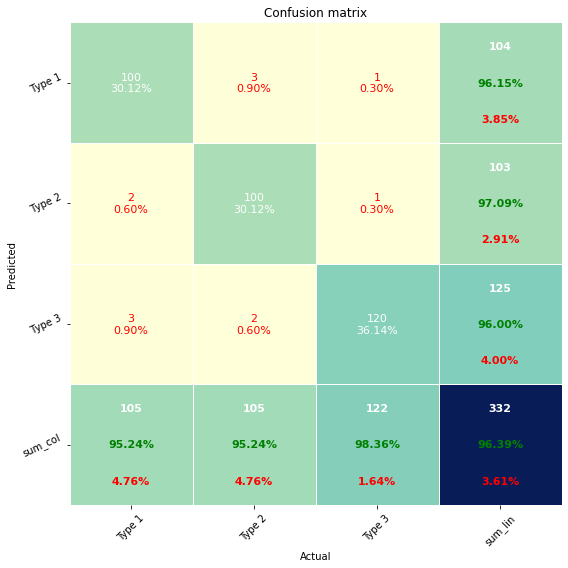

In [3]:
from pretty_confusion_matrix import pp_matrix
plt.figure(figsize=(10, 10))
confusion_matrix = pd.read_csv("./data/Confusion_Matrix.csv", index_col=0)
Plot.pp_matrix(confusion_matrix, cmap = 'YlGnBu')
plt.savefig("./figures/Figure2_Confusion_Matrix.pdf", dpi = 150)

## Figure 3. Training Accuracy vs. Training Data Size Across Models

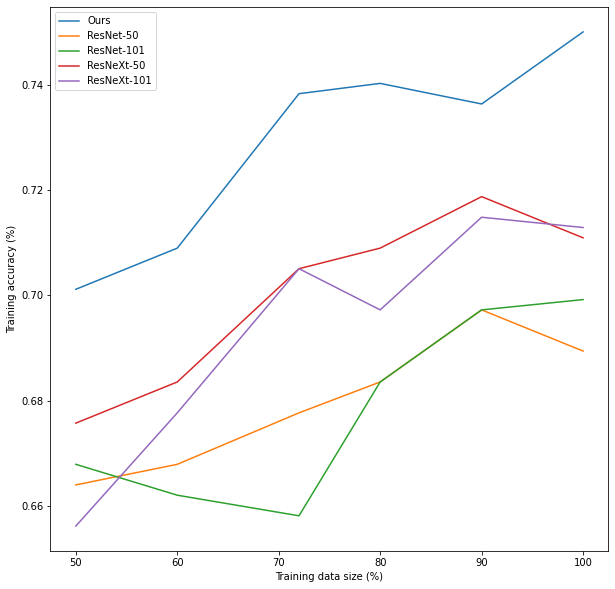

In [6]:
acc_data_size = pd.read_csv("./data/accuracy_data_size.csv")
# acc_data_size *= 100
acc_data_size.plot(x="data size", y=['Ours', 'ResNet-50', 'ResNet-101', 'ResNeXt-50', 'ResNeXt-101'], figsize=(10, 10))
plt.xlabel('Training data size (%)')
plt.ylabel('Training accuracy (%)')
plt.savefig("./figures/Figure3_Accuracy_Data_Size.pdf", dpi = 150)

## Fig 4. Training and Testing Accuracy vs. Epochs

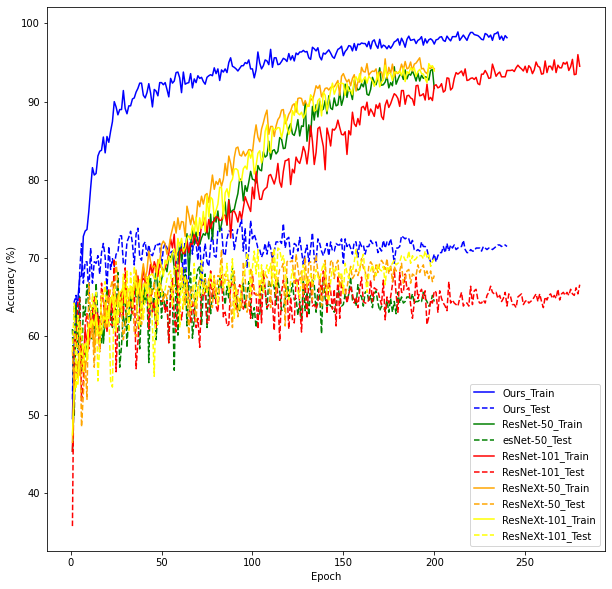

In [9]:
accuracy_epoch = pd.read_csv("./data/accuracy_epoch_100%.csv")
accuracy_epoch *= 100
accuracy_epoch['Epoch'] /= 100
plt.figure(figsize=(10, 10))

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['Ours_Train'], color = "b", linestyle="-", label="Ours_Train")
plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['Ours_Test'], color = "b", linestyle="--", label="Ours_Test")

plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNet-50_Train'], color = "g", linestyle="-", label="ResNet-50_Train")
plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNet-50_Test'], color = "g", linestyle="--", label="esNet-50_Test")

plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNet-101_Train'], color = "r", linestyle="-", label="ResNet-101_Train")
plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNet-101_Test'], color = "r", linestyle="--", label="ResNet-101_Test")

plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNeXt-50_Train'], color = "orange", linestyle="-", label="ResNeXt-50_Train")
plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNeXt-50_Test'], color = "orange", linestyle="--", label="ResNeXt-50_Test")

plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNeXt-101_Train'], color = "yellow", linestyle="-", label="ResNeXt-101_Train")
plt.plot(accuracy_epoch['Epoch'], accuracy_epoch['ResNeXt-101_Test'], color = "yellow", linestyle="--", label="ResNeXt-101_Test")

plt.legend()
plt.savefig("./figures/Figure4_Accuracy_Epochs.pdf", dpi = 150)